<a href="https://colab.research.google.com/github/praveengutti/Mobile-Price-Range-Prediction/blob/main/Mobile_Price_Range_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Project Title : Mobile Price Range Prediction**

In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

# **Data Description -**

**Battery_power** - Total energy a battery can store in one time measured in mAh

**Blue** - Has bluetooth or not

**Clock_speed**- speed at which microprocessor executes instructions

**Dual_sim**- Has dual sim support or not

**Fc** - Front Camera mega pixels

**Four_g** - Has 4G or not

**Int_memory** - Internal Memory in Gigabytes

**M_dep** - Mobile Depth in cm

**Mobile_wt** - Weight of mobile phone

**N_cores** - Number of cores of processor

**Pc** - Primary Camera mega pixels

**Px_height** - Pixel Resolution Height

**Px_width** - Pixel Resolution Width

**Ram** - Random Access Memory in Mega Bytes

**Sc_h** - Screen Height of mobile in cm

**Sc_w** - Screen Width of mobile in cm

**Talk_time** - longest time that a single battery charge will last when you are

**Three_g** - Has 3G or not

**Touch_screen** - Has touch screen or not

**Wifi**- Has wifi or not

**Price_range** - This is the target variable with value of 0(low cost), 1(medium cost),2(high cost) and 3(very high cost).

# **Importing Libraries**

In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix , plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve

# **Loading the dataset**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Reading a data file
df=pd.read_csv("/content/drive/MyDrive/Mobile Price Range Prediction/data_mobile_price_range.csv")

In [ ]:
#It gives Top 5 rows of Dataset 
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
#It gives last 5 rows of Dataset
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [ ]:
# It gives Total number of rows and columns of dataset
df.shape

(2000, 21)

**The dataset has 2000 rows and 21 columns**

In [ ]:
#It gives some basic statistical details like percentile, mean, std, max etc.
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Points to note:

*   We have dichotomous type variables such as blue, wifi, three_g, four_g, dual_sim and touch_screen
*   WE have some nominal type variables such as n_cores and m_deep.
*   We have clock_speed, fc, pc, sc_h, sc_w, talktime whose range is low.
*   We also have other numerical variables whose range is pretty high.



In [ ]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
#It gives total columns, data types and null count of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
#null values sum of target variable ('price_range')
df['price_range'].isnull().sum()

0

In [ ]:
#It counts the value of each class
df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

**Price_range - This is the target variable with value of 0(low cost), 1(medium cost),2(high cost) and 3(very high cost).** 

In [ ]:
df['blue'].value_counts()

0    1010
1     990
Name: blue, dtype: int64

**1010 mobiles have bluetooth and 990 does not have bluetooth**

In [ ]:
df['dual_sim'].value_counts()

1    1019
0     981
Name: dual_sim, dtype: int64

**1019 mobiles contains dual sim slot and 981 mobiles are not**

In [ ]:
df['four_g'].value_counts()

1    1043
0     957
Name: four_g, dtype: int64

**1043 mobiles have four_g facility and 957 are not**

**There are 10 different mobile-depths in the dataset**

In [ ]:
df['n_cores'].value_counts()

4    274
7    259
8    256
2    247
3    246
5    246
1    242
6    230
Name: n_cores, dtype: int64

**Dataset contains 8 different cores**

# **Explortory Data Analysis**

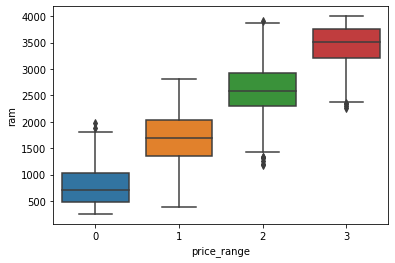

In [ ]:
#Boxplot between ram and price_range
sns.boxplot(y = 'ram' , x = 'price_range',data= df)
plt.show()

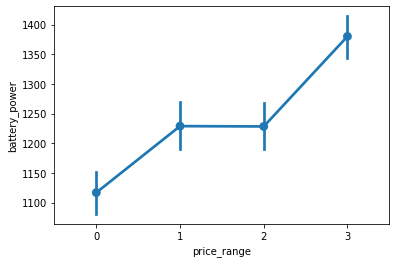

In [ ]:
sns.pointplot(y= 'battery_power', x = 'price_range', data=df)

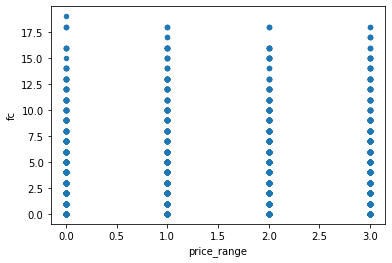

In [ ]:
df.plot(x='price_range',y='fc',kind='scatter')
plt.show()

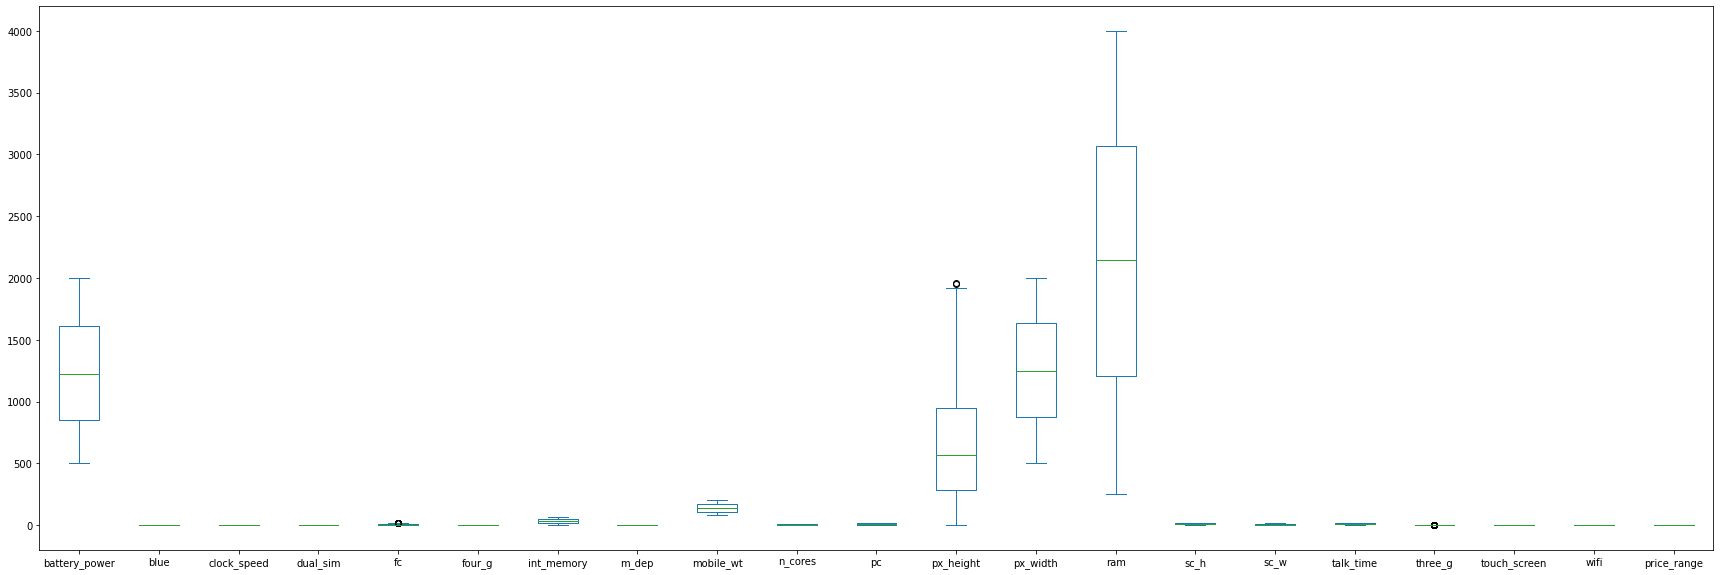

In [ ]:
df.plot(kind='box',figsize=(30,10))
plt.show()
#outlayers

# **Plotting Relation between Price Range & Battery Power**

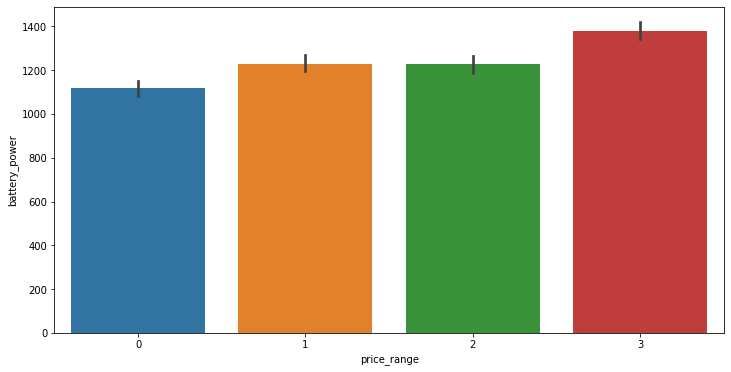

In [ ]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'price_range', y = 'battery_power', data=df)
plt.show()

# **Plotting Relation between Price Range & Pixel Height/Width**

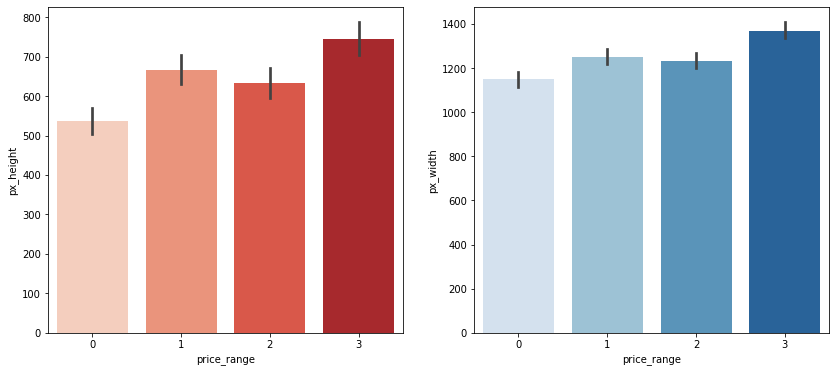

In [ ]:
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.barplot(x = 'price_range', y = 'px_height', data=df, palette = 'Reds')
plt.subplot(1,2,2)
sns.barplot(x = 'price_range', y = 'px_width', data=df , palette = 'Blues')
plt.show()

# **Plotting Relation between Price Range & RAM**

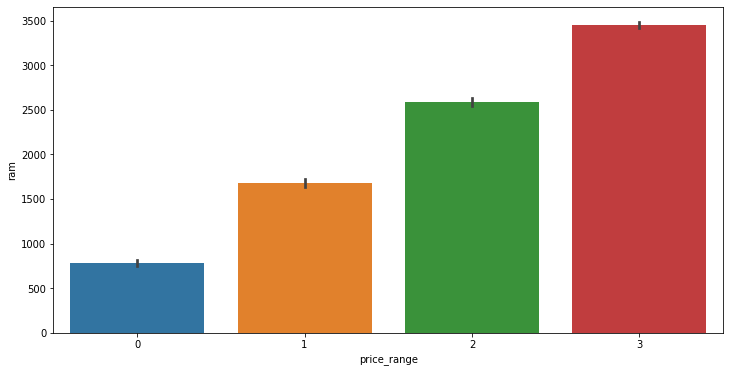

In [ ]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'price_range', y = 'ram',data=df)
plt.show()

# **Plotting Relation between Price Range & 3G/4G**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


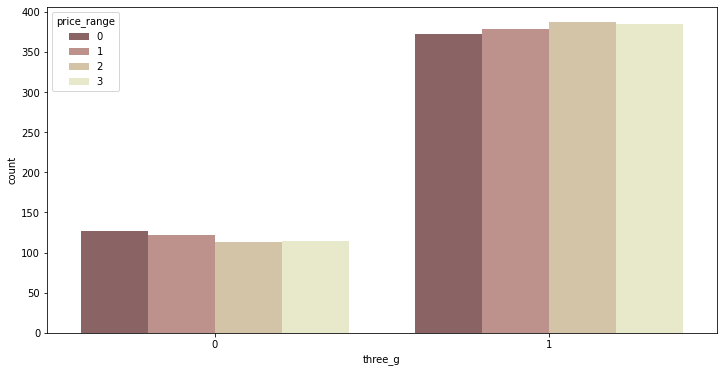

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(df['three_g'] , hue = df['price_range'] , palette = 'pink')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


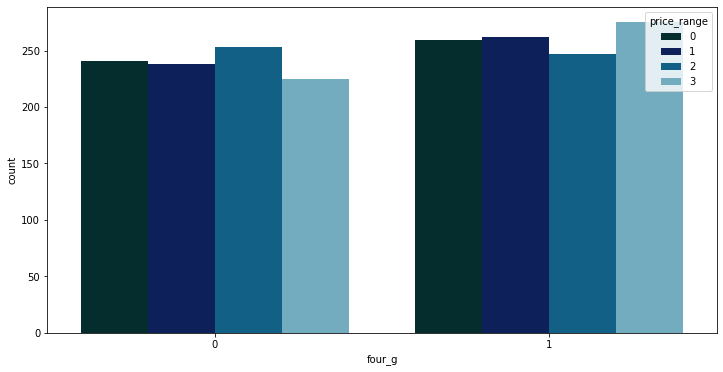

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(df['four_g'] , hue = df['price_range'] , palette = 'ocean')
plt.show()

# **Plotting Relation between Price Range & Memory**

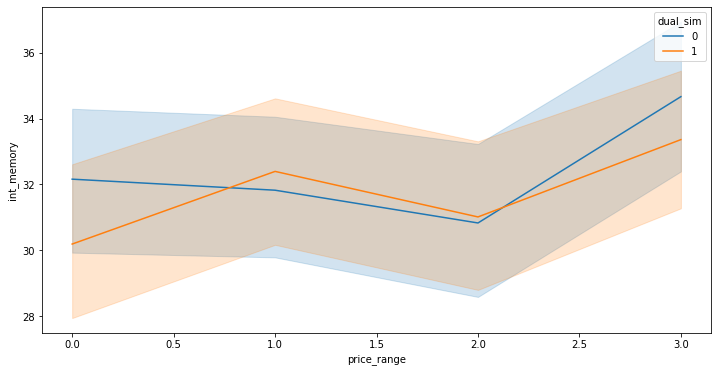

In [ ]:
plt.figure(figsize = (12,6))
sns.lineplot(x = 'price_range' , y = 'int_memory' , data = df , hue = 'dual_sim')
plt.show()

*   **There is drastic increase in internal memory for very high prices.**
*   **Also there is drastic decrease in mobile weight for very high prices.**



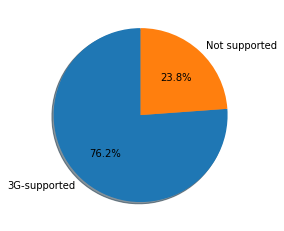

In [ ]:
#percentage of phones which support 3g
labels = ["3G-supported",'Not supported']
values=df['three_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

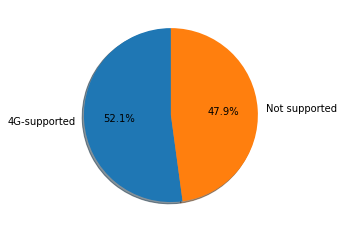

In [ ]:
#percentage of phones which support 4g
labels = ["4G-supported",'Not supported']
values=df['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

# Correlation

**In this section we will try to find relationship of each variables, their importance and impact on our dependent variable.**

In [ ]:
#correlation
df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


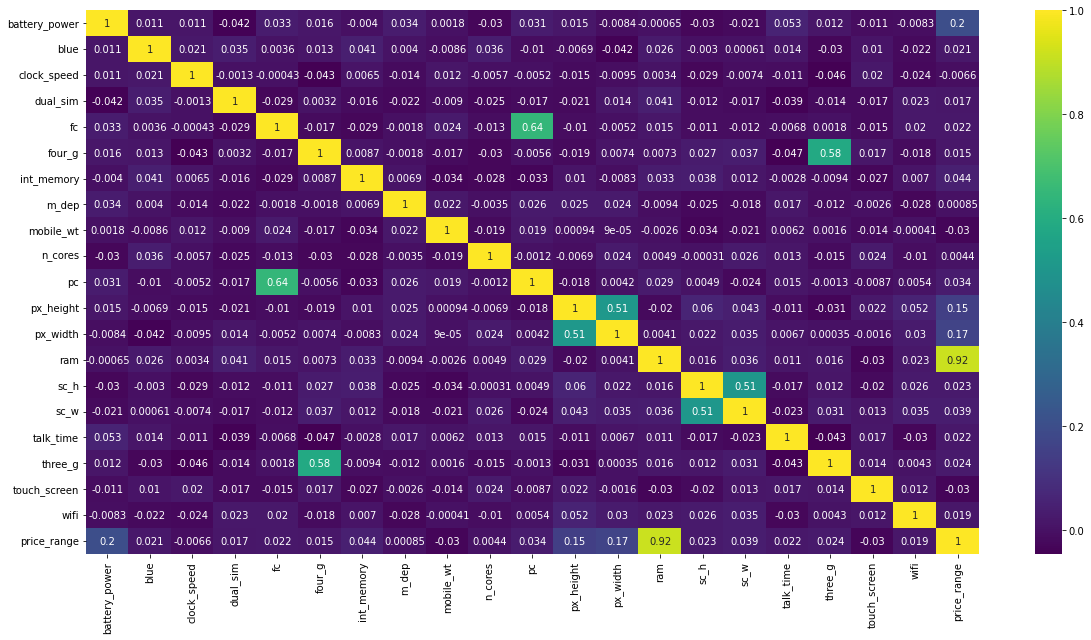

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))         # Sample figsize in inches
sns.heatmap(df.corr(), cmap='viridis', annot=True)

**Observation**

*   pc is correlated with fc.
*   three_g and four_g are moderately correlated.
*   sc_h and sc_w are moderately correlated. We will try to change them into a single variable.
*  px_width and px_height are moderately correlated. We will try to change them into a single variable.
*   Ram is highly correlated with our price range. May be one the most important factor in determining the price.




# **Splitting the data**

In [ ]:
#independent variables
X = df.drop('price_range',axis=1)

In [ ]:
#dependent variable
y = df['price_range']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42, stratify=y)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(1340, 20)
(660, 20)


# **Fitting Models**

*   In this section we are going to implement various machine learning algorithms to make our predictions. Some of the algorithms we will be using are: Random Forest Classifier, XGBoost Classifier.
*   The detailed step we will be following are as follows
     
     1.Initial fitting of the model.
    
     2.Evaluating the performance of the model using metrics.
     
     3.Hyperparameter tuning to improve model performance and to reduce if 
       overfitting occurs.


# **KNN Classifier**

In [ ]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

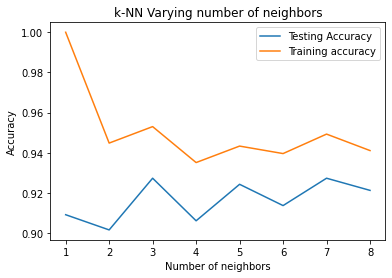

In [ ]:
# Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=7)

In [ ]:
# Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
#calculating metrics
knn_test_score = knn.score(X_test,y_test)
knn_test_score

0.9272727272727272

In [ ]:
knn_train_score = knn.score(X_train,y_train)
knn_train_score

0.9492537313432836

In [ ]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix,roc_auc_score,classification_report,roc_curve

In [ ]:
# Let us get the predictions using the classifier we had fit above
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

In [ ]:
matrix = confusion_matrix(y_test,y_test_pred)
matrix

array([[160,   5,   0,   0],
       [  6, 153,   6,   0],
       [  0,   8, 149,   8],
       [  0,   0,  15, 150]])

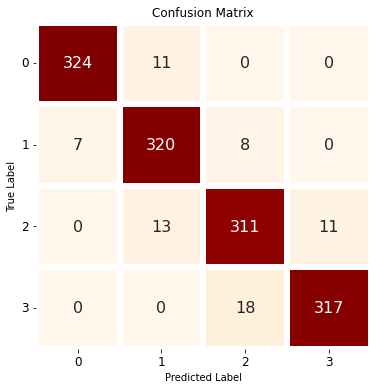

In [ ]:
#plotting confusion matrix for train set
cm = confusion_matrix(y_train, y_train_pred)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="OrRd", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

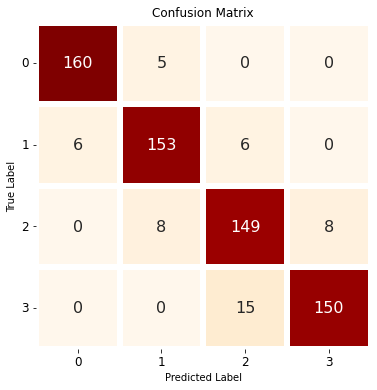

In [ ]:
#plotting confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="OrRd", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

In [ ]:
#predicting 
y_pred_proba = knn.predict_proba(X_test)

In [ ]:
roc_auc_score(y_test, y_pred_proba, multi_class='ovo', average='weighted')

0.9931741659014386

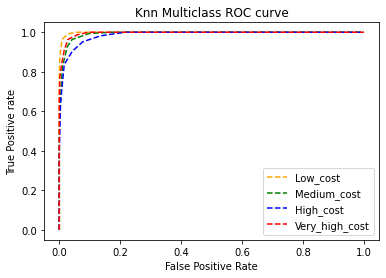

In [ ]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_proba[:,i], pos_label=i)
    
# plotting multiclass ROC curve   
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Low_cost')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Medium_cost')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='High_cost')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Very_high_cost')
plt.title('Knn Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

In [ ]:
#printing classification report for train data
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       335
           1       0.93      0.96      0.94       335
           2       0.92      0.93      0.93       335
           3       0.97      0.95      0.96       335

    accuracy                           0.95      1340
   macro avg       0.95      0.95      0.95      1340
weighted avg       0.95      0.95      0.95      1340



In [ ]:
#printing classification report for test data
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       165
           1       0.92      0.93      0.92       165
           2       0.88      0.90      0.89       165
           3       0.95      0.91      0.93       165

    accuracy                           0.93       660
   macro avg       0.93      0.93      0.93       660
weighted avg       0.93      0.93      0.93       660



In [ ]:
y_test_pred

array([0, 2, 3, 3, 1, 3, 3, 1, 2, 2, 3, 3, 2, 1, 0, 3, 2, 0, 3, 3, 0, 2,
       1, 1, 3, 3, 1, 0, 1, 3, 3, 1, 3, 3, 1, 1, 3, 1, 3, 3, 2, 2, 2, 3,
       2, 2, 2, 0, 3, 0, 0, 2, 0, 3, 1, 0, 1, 3, 2, 0, 0, 2, 2, 1, 0, 2,
       0, 2, 0, 0, 1, 2, 3, 1, 2, 0, 2, 1, 1, 3, 2, 1, 1, 2, 3, 0, 2, 0,
       0, 0, 0, 3, 3, 0, 3, 1, 3, 2, 3, 1, 0, 2, 2, 0, 0, 3, 2, 2, 1, 0,
       3, 1, 1, 1, 0, 1, 2, 3, 3, 2, 0, 0, 1, 0, 3, 2, 0, 0, 0, 2, 3, 1,
       2, 0, 1, 0, 2, 1, 0, 2, 1, 1, 3, 2, 3, 2, 3, 0, 3, 1, 2, 1, 3, 1,
       2, 0, 0, 1, 3, 3, 2, 2, 2, 0, 2, 2, 1, 0, 1, 2, 3, 2, 0, 3, 3, 2,
       2, 0, 1, 2, 1, 0, 2, 2, 0, 3, 2, 0, 2, 2, 3, 0, 1, 2, 2, 2, 3, 1,
       3, 0, 2, 2, 0, 3, 1, 1, 1, 3, 1, 2, 2, 1, 3, 2, 2, 3, 3, 1, 2, 0,
       1, 0, 3, 3, 3, 2, 0, 1, 3, 1, 3, 0, 3, 2, 0, 0, 2, 1, 1, 2, 0, 2,
       0, 1, 3, 3, 2, 0, 2, 1, 0, 0, 3, 0, 3, 2, 3, 1, 1, 1, 1, 1, 3, 1,
       0, 1, 0, 1, 1, 3, 1, 1, 2, 3, 3, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       0, 3, 0, 3, 3, 1, 2, 3, 0, 2, 3, 0, 0, 0, 2,

In [ ]:
y_test

1294    0
403     2
125     3
1871    3
297     1
       ..
303     3
1638    2
1804    1
893     1
262     0
Name: price_range, Length: 660, dtype: int64

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
param_dict

{'max_depth': [4, 6, 8],
 'min_samples_leaf': [40, 50],
 'min_samples_split': [50, 100, 150],
 'n_estimators': [50, 80, 100]}

In [ ]:
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='accuracy')

rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='accuracy', verbose=2)

In [ ]:
rf_grid.best_estimator_

RandomForestClassifier(max_depth=8, min_samples_leaf=40, min_samples_split=50)

In [ ]:
rf_optimal_model = rf_grid.best_estimator_

In [ ]:
#best parameters for the data
rf_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [ ]:
# Making predictions on train and test data

train_class_preds = rf_optimal_model.predict(X_train)
test_class_preds = rf_optimal_model.predict(X_test)

In [ ]:
# Get the probabilities on train and test
train_preds = rf_optimal_model.predict_proba(X_train)[:,1]
test_preds = rf_optimal_model.predict_proba(X_test)[:,1]

In [ ]:
len(train_preds)

1340

In [ ]:
train_class_preds

array([2, 0, 0, ..., 3, 0, 0])

In [ ]:
test_class_preds

array([0, 1, 3, 3, 1, 3, 3, 1, 2, 2, 3, 3, 1, 1, 0, 3, 2, 0, 3, 3, 0, 2,
       1, 1, 3, 3, 1, 0, 1, 3, 3, 1, 3, 3, 1, 1, 3, 0, 3, 3, 2, 3, 2, 3,
       1, 2, 2, 0, 3, 0, 1, 1, 0, 3, 2, 0, 1, 3, 1, 1, 0, 2, 2, 1, 0, 2,
       0, 2, 0, 0, 1, 1, 3, 1, 2, 0, 2, 1, 1, 3, 2, 1, 1, 1, 3, 1, 2, 0,
       0, 0, 0, 3, 3, 0, 3, 1, 3, 2, 3, 1, 0, 2, 2, 0, 0, 3, 3, 2, 1, 0,
       3, 1, 1, 0, 0, 0, 2, 3, 3, 2, 0, 0, 1, 0, 3, 1, 0, 0, 0, 2, 3, 1,
       3, 0, 1, 0, 1, 1, 0, 2, 1, 1, 3, 2, 2, 1, 3, 0, 3, 1, 1, 1, 3, 1,
       2, 0, 0, 0, 3, 3, 1, 1, 2, 0, 2, 2, 1, 0, 1, 2, 3, 2, 0, 3, 3, 1,
       1, 0, 1, 2, 1, 0, 2, 2, 1, 3, 2, 0, 2, 3, 3, 0, 1, 1, 1, 1, 3, 2,
       3, 0, 2, 2, 0, 3, 1, 1, 1, 3, 2, 2, 2, 1, 3, 2, 2, 3, 3, 2, 3, 0,
       1, 0, 3, 3, 3, 3, 0, 1, 3, 1, 3, 0, 3, 2, 0, 0, 2, 0, 0, 3, 0, 2,
       0, 1, 3, 3, 2, 0, 1, 2, 0, 0, 3, 0, 3, 2, 3, 0, 1, 1, 1, 1, 3, 1,
       0, 1, 0, 1, 1, 3, 1, 1, 2, 3, 3, 1, 3, 2, 2, 2, 2, 1, 0, 2, 1, 2,
       0, 3, 0, 3, 2, 1, 1, 2, 0, 2, 3, 0, 0, 0, 1,

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train,train_class_preds)
test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.8768656716417911
The accuracy on test dataset is 0.8181818181818182


In [ ]:
# Get the confusion matrices for train and test
train_cm = confusion_matrix(y_train,train_class_preds)
test_cm = confusion_matrix(y_test,test_class_preds )

In [ ]:
train_cm

array([[322,  13,   0,   0],
       [ 26, 277,  32,   0],
       [  0,  60, 250,  25],
       [  0,   0,   9, 326]])

In [ ]:
test_cm

array([[155,  10,   0,   0],
       [ 13, 130,  22,   0],
       [  0,  36,  99,  30],
       [  0,   0,   9, 156]])

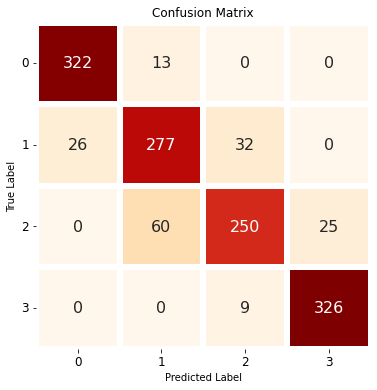

In [ ]:
cm = confusion_matrix(y_train,train_class_preds)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="OrRd", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

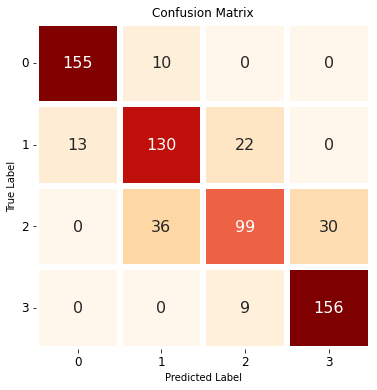

In [ ]:
cm = confusion_matrix(y_test, test_class_preds)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="OrRd", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

In [ ]:
print(classification_report(y_train,train_class_preds))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       335
           1       0.79      0.83      0.81       335
           2       0.86      0.75      0.80       335
           3       0.93      0.97      0.95       335

    accuracy                           0.88      1340
   macro avg       0.88      0.88      0.88      1340
weighted avg       0.88      0.88      0.88      1340



In [ ]:
print(classification_report(y_test,test_class_preds))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       165
           1       0.74      0.79      0.76       165
           2       0.76      0.60      0.67       165
           3       0.84      0.95      0.89       165

    accuracy                           0.82       660
   macro avg       0.82      0.82      0.81       660
weighted avg       0.82      0.82      0.81       660



# **GradientBoostingClassifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
state = 12  
test_size = 0.33
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,  
    test_size=test_size, random_state=state)

In [ ]:
#Find the best learning rate value 
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_val, y_val)))

Learning rate:  0.05
Accuracy score (training): 0.797
Accuracy score (validation): 0.772
Learning rate:  0.075
Accuracy score (training): 0.802
Accuracy score (validation): 0.777
Learning rate:  0.1
Accuracy score (training): 0.829
Accuracy score (validation): 0.797
Learning rate:  0.25
Accuracy score (training): 0.929
Accuracy score (validation): 0.844
Learning rate:  0.5
Accuracy score (training): 0.983
Accuracy score (validation): 0.874
Learning rate:  0.75
Accuracy score (training): 0.997
Accuracy score (validation): 0.894
Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 0.876


We're mainly interested in the classifier's accuracy on the validation set, but it looks like a learning rate of 1 gives us the best performance on the validation set and good performance on the training set.

Now we can evaluate the classifier by checking its accuracy and creating a confusion matrix. Let's create a new classifier and specify the best learning rate we discovered.

In [ ]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=1, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_val)

print("Confusion Matrix:")
print(confusion_matrix(y_val, predictions))

print("Classification Report")
print(classification_report(y_val, predictions))

Confusion Matrix:
[[102   5   0   0]
 [ 10 102  11   0]
 [  0  11  87   8]
 [  0   0  10  97]]
Classification Report
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       107
           1       0.86      0.83      0.85       123
           2       0.81      0.82      0.81       106
           3       0.92      0.91      0.92       107

    accuracy                           0.88       443
   macro avg       0.88      0.88      0.88       443
weighted avg       0.88      0.88      0.88       443



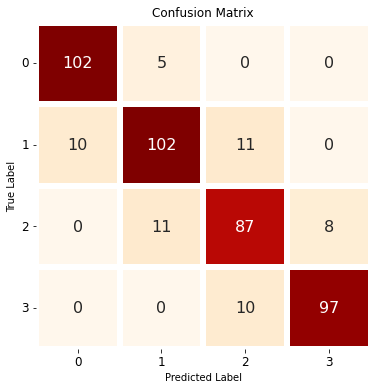

In [ ]:
#plotting the confusion matrix for train set
cm = confusion_matrix(y_val, predictions)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="OrRd", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

In [ ]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=1, max_depth=2, random_state=0)
gb_clf2.fit(X_test, y_test)
test_pred = gb_clf2.predict(X_val)


print("Confusion Matrix:")
print(confusion_matrix(y_val, test_pred))

print("Classification Report")
print(classification_report(y_val, test_pred))

Confusion Matrix:
[[101   6   0   0]
 [  7 107   9   0]
 [  0  12  84  10]
 [  0   0   9  98]]
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       107
           1       0.86      0.87      0.86       123
           2       0.82      0.79      0.81       106
           3       0.91      0.92      0.91       107

    accuracy                           0.88       443
   macro avg       0.88      0.88      0.88       443
weighted avg       0.88      0.88      0.88       443



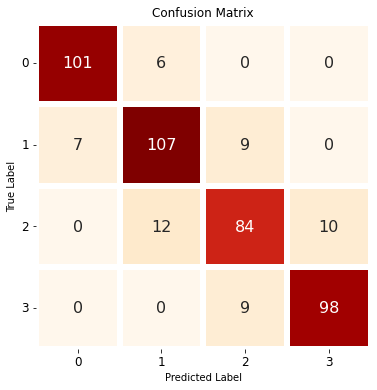

In [ ]:
#plotting the confusion matrix for test set
cm = confusion_matrix(y_val, test_pred)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="OrRd", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

# **XGBClassifier**

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

In [ ]:
predict = xgb_clf.predict(X_val)

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_val, predict))

print("Classification Report")
print(classification_report(y_val, predict))

Confusion Matrix:
[[104   3   0   0]
 [ 10 106   7   0]
 [  0   6  91   9]
 [  0   0   7 100]]
Classification Report
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       107
           1       0.92      0.86      0.89       123
           2       0.87      0.86      0.86       106
           3       0.92      0.93      0.93       107

    accuracy                           0.91       443
   macro avg       0.90      0.91      0.91       443
weighted avg       0.91      0.91      0.90       443



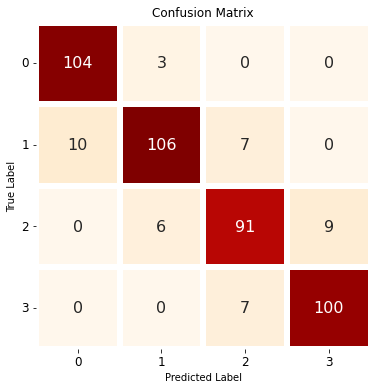

In [ ]:
#plotting the confusion matrix for train set
cm = confusion_matrix(y_val, predict)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="OrRd", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

In [ ]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_test, y_test)

XGBClassifier(objective='multi:softprob')

In [ ]:
test_predict = xgb_clf.predict(X_val)

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_val, test_predict))

print("Classification Report")
print(classification_report(y_val, test_predict))

Confusion Matrix:
[[102   5   0   0]
 [  9 105   9   0]
 [  0  13  83  10]
 [  0   0  11  96]]
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       107
           1       0.85      0.85      0.85       123
           2       0.81      0.78      0.79       106
           3       0.91      0.90      0.90       107

    accuracy                           0.87       443
   macro avg       0.87      0.87      0.87       443
weighted avg       0.87      0.87      0.87       443



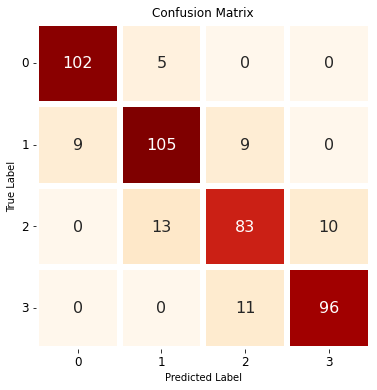

In [ ]:
#plotting the confusion matrix for test set
cm = confusion_matrix(y_val, test_predict)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="OrRd", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic_model = LogisticRegression(fit_intercept=True, max_iter=10000)
logistic_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(max_iter=10000)

In [ ]:
# Get the predicted probabilities
train_preds_proba = logistic_model.predict_proba(X_train)
test_preds_proba = logistic_model.predict_proba(X_test)

In [ ]:
# Get the predicted classes
train_class_pred = logistic_model.predict(X_train)
test_class_pred = logistic_model.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_pred,y_train)
test_accuracy = accuracy_score(test_class_pred,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.7803790412486065
The accuracy on test data is  0.7227272727272728


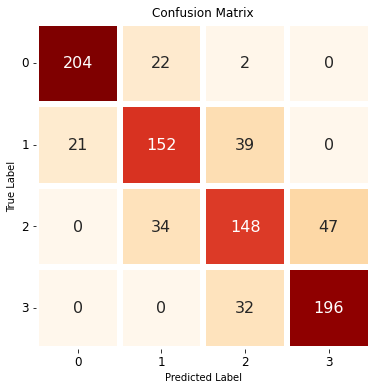

In [ ]:
# Get the confusion matrix for both train and test

labels = ['0', '1' , '2', '3']
cm = confusion_matrix(y_train, train_class_pred)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="OrRd", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

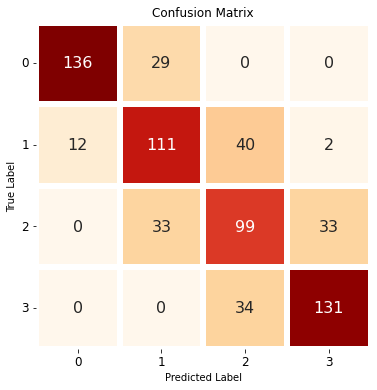

In [ ]:
cm = confusion_matrix(y_test, test_class_pred)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="OrRd", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

In [ ]:
#predicting 
y_pred_proba = logistic_model.predict_proba(X_test)

In [ ]:
roc_auc_score(y_test, y_pred_proba, multi_class='ovo', average='weighted')

0.922724211815121

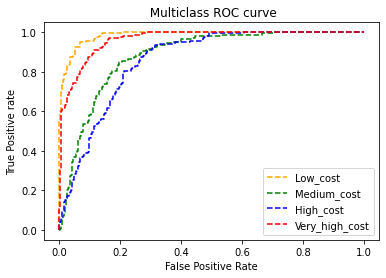

In [ ]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, test_preds_proba[:,i], pos_label=i)
    
# plotting multiclass ROC curve   
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Low_cost')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Medium_cost')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='High_cost')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Very_high_cost')
plt.title(' Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

In [ ]:
print(classification_report(y_train,train_class_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       228
           1       0.73      0.72      0.72       212
           2       0.67      0.65      0.66       229
           3       0.81      0.86      0.83       228

    accuracy                           0.78       897
   macro avg       0.78      0.78      0.78       897
weighted avg       0.78      0.78      0.78       897



In [ ]:
print(classification_report(y_test,test_class_pred))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87       165
           1       0.64      0.67      0.66       165
           2       0.57      0.60      0.59       165
           3       0.79      0.79      0.79       165

    accuracy                           0.72       660
   macro avg       0.73      0.72      0.73       660
weighted avg       0.73      0.72      0.73       660



# **GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#grid parameters
grid_params = {
    'n_neighbors' : [3,5,7,11,13,17,19],
    'weights' : ['uniform','distance'],
    'metric' : ['euclidean','manhattan']
}

gs = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    verbose=1,
    cv = 5,
    n_jobs = -1
    )

In [ ]:
gs_results = gs.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


In [ ]:
#hyperparameters tuned
gs_results

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 11, 13, 17, 19],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [ ]:
#best estimator
gs_results.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=19, weights='distance')

In [ ]:
#best score
gs_results.best_score_

0.9130602110490379

In [ ]:
#best parameters
gs_results.best_params_

{'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}

In [ ]:
gs_results2 = gs.fit(X_test,y_test)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


In [ ]:
gs_results2

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 11, 13, 17, 19],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [ ]:
gs_results2.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance')

In [ ]:
gs_results2.best_score_

0.9242424242424242

In [ ]:
gs_results2.best_params_

{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


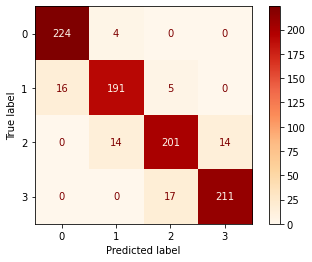

In [ ]:
#plotting confusion matrix for train set
plot_confusion_matrix(gs_results2,X_train, y_train , values_format='d',cmap="OrRd")

In [ ]:
print(classification_report(y_train , gs_results2.predict(X_train)))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       228
           1       0.91      0.90      0.91       212
           2       0.90      0.88      0.89       229
           3       0.94      0.93      0.93       228

    accuracy                           0.92       897
   macro avg       0.92      0.92      0.92       897
weighted avg       0.92      0.92      0.92       897



In [ ]:
#feature impotance for random forest model
importances = rf_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df

,Feature,Feature Importance
0,battery_power,0.07
1,blue,0.00
2,clock_speed,0.01
3,dual_sim,0.00
4,fc,0.01
5,four_g,0.00
6,int_memory,0.01
7,m_dep,0.01
8,mobile_wt,0.01
9,n_cores,0.01


In [ ]:
ab = importance_df.sort_values(by=['Feature Importance'],ascending=False)

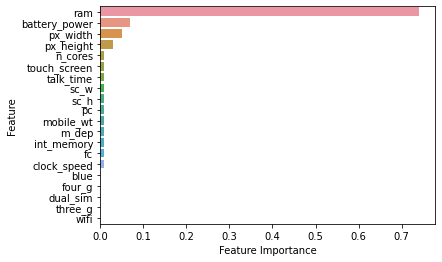

In [ ]:
#plotting feature importance for random forest
sns.barplot(data =ab , x = 'Feature Importance',y = 'Feature')

In [ ]:
#feature importance for xgboost
importances = xgb_clf.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)
importance_df

,Feature,Feature Importance
0,battery_power,0.09
1,blue,0.04
2,clock_speed,0.02
3,dual_sim,0.00
4,fc,0.04
5,four_g,0.01
6,int_memory,0.03
7,m_dep,0.02
8,mobile_wt,0.04
9,n_cores,0.02


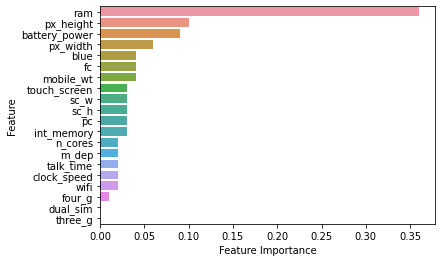

In [ ]:
#plotting feature importance for xgboost 
ab = importance_df.sort_values(by=['Feature Importance'],ascending=False)
sns.barplot(data =ab , x = 'Feature Importance',y = 'Feature')

**Observations from the summary plot are:**
*   The most important features in determining the predictions are ram, battery power, px_height.
*   Higher values of ram are increasing the predicted class.


*   Higher values of battery power are increasing the predicted class.

*   Higher values of px_height and px_weight are increasing the predicted class.

# **Conclusion**

1. Ram , Battery_power features were found to be the most relevant features for 
predicting price range of mobiles and dropping negative correlation features which are clock speed , mobile_wt , touch_screen

2. Kneighbors and Xgboost are given best accuracy score 95% test ,93% train and 91% train , 88% test respectively ,  roc_auc score for kneighbors is 99%

3. Tuning the hyperparameters by GridSearchCV on kneighbors but not getting much difference in results but the best parameters, n_neighbors for train and test are 11 and 17 

4. Logistic regression is giving the less results among all the algorithms

5. So we conclude that kneighbors classifier is giving the best results for these dataset 

6. So we can say that in the price range prediction as the ram and battery_power increases the price range will increase for sure 